<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%93%A4%EC%96%B4%EA%B0%80%EA%B8%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(FASHION_MNIST)%EC%99%84%EC%84%B1%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 문제 해결 과정
#### 문제 정의 -> 데이터 전처리 -> 모델 학습 -> 성능 평가 -> 일반화 및 공유

## 1. 문제 정의
### 1-1. 이미지 인식

컴퓨터는 이미지 데이터를 픽셀(pixel)들의 모음으로 이해한다. 픽셀은 이미지를 구성하는 최소 단위로 0~255의 값으로 표현된다. 위의 흑백 이미지는 너비 12개, 높이 16개, 총 12 X 16 (192)개의 픽셀로 이루어져있다. 각 픽셀은 0(검정색) ~ 255(흰색)의 값으로 표현되어있는 것을 볼 수 있다. 즉, 컴퓨터는 이미지를 숫자로 받아들이며, 이 숫자를 이용하여 연산을 수행할 수 있다.

<img src="https://habrastorage.org/webt/56/h5/g6/56h5g6loe_bu4_oiuu0-vy_unoc.png" width=500px>

<img src="https://habrastorage.org/webt/nn/2r/q6/nn2rq6itb9gz5suamhcl5kvjwtu.png" width=500px>


이렇게 일반적으로 이미지 데이터는 3차원으로 이루어져있으며, 각 차원을 너비, 높이, 채널(channel)이라고 부른다. 흑백 이미지 데이터는 흑백 표현을 위한 1개의 채널을, 컬러 이미지 데이터는 빨강, 초록, 파랑 표현을 위한 3개의 채널을 지닌다.

<img src="https://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png">

### 1-2. MNIST 손글씨 인식하기
- 0 ~ 9 손글씨 숫자 데이터 각 6000개, 총 60000개의 28 * 28 크기 데이터
- 학습 데이터 60000개, 테스트 데이터 10000개로 구성


<img src="https://learnmachinelearning.files.wordpress.com/2017/08/mnist.png?w=638" height="150px">

## 2. 데이터 수집
### 2-1. 데이터 로드하기

In [ ]:
# 필요한 라이브러리 호출
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# MNIST 데이터셋 로드
from keras.datasets import fashion_mnist

# X_train: 학습 데이터   y_train: 학습 레이블(정답)
# X_test: 테스트 데이터  y_test: 테스트 레이블(정답)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# 학습 데이터 눈으로 확인해보기
X_train[234]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0, 136, 173, 165,
        157, 158, 175, 207, 220, 220,   0,   0,   0,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,  78, 217, 208, 218, 230,
        232, 245, 255, 245, 233, 210, 218,  92,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  50, 187, 211, 201, 196, 203, 178,
        152, 164, 211, 199, 197, 181, 192, 215, 194, 133,   0,   0,   2,
          0,   0],
       [  0,   0,   0,   0,   0,  75, 193, 186, 193, 189, 195, 190, 213,
        213, 198, 194, 186, 172, 164, 197, 193, 198, 214, 151,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 189, 198, 177, 195, 204, 200, 201, 181,
        184, 199, 195, 197, 184, 190, 209, 198, 200, 196, 212,  85,   0,
          0,   0],
       [  0,   0,   0,   0,  58, 208, 204, 192, 199, 202, 183, 198, 203,
        205, 210, 198, 197, 199, 202, 186, 196, 214, 187, 184, 117,   0,
          0,   0],
       [  

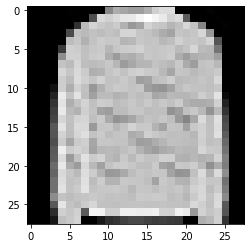

In [ ]:
# 학습 데이터 이미지로 출력해보기
plt.imshow(X_train[234], cmap='gray')

In [ ]:
# 학습 데이터 레이블 확인하기
y_train[234]

2

### 2-2. 우리는 처음이니깐^^ 이미지 데이터 주물러보기


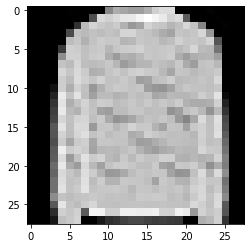

In [ ]:
# 이미지 주무르기
arr = X_train[234].copy()
plt.imshow(arr, cmap='gray')

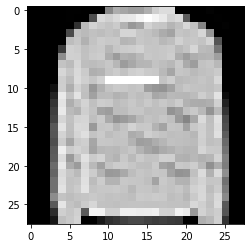

In [ ]:
# 1을 7로 만들기
arr[9:10, 10:17] = 255
plt.imshow(arr, cmap='gray')

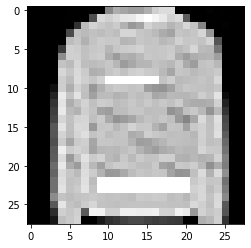

In [ ]:
# 7을 2로 만들기
arr[22:24, 9:21] = 255
plt.imshow(arr, cmap='gray')

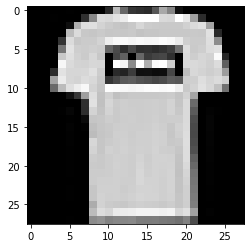

In [ ]:
plt.imshow(X_train[1], cmap='gray')

## 3. 데이터 전처리를 하지 않은 모델 만들기

#### * 원핫인코딩(one-hot encoding)
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTvLSynURni0v1cF_weoBFSKkC94cGrOH8yPblJkIP68QjiaN-4" width=200px>

원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식이다.

In [ ]:
from keras.utils import to_categorical

# 레이블 0 ~ 9를 원핫인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[234]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# 자주 사용되는 값을 변수로 지정
num_classes = 10 # 구분할 클래스의 개수
num_pixels = 28*28 #이미지 데이터의 크기

### 3-1. 모델 구성

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# 모델 구성
model1 = Sequential()
model1.add(Flatten()) # 은닉층1 : 2차원->1차원
model1.add(Dense(num_pixels, input_dim=num_pixels, activation='relu')) # 은닉층2
model1.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 학습
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 1s - loss: 12.7970 - accuracy: 0.7709 - val_loss: 3.3420 - val_accuracy: 0.7939
Epoch 2/10
300/300 - 1s - loss: 1.6737 - accuracy: 0.8176 - val_loss: 1.2351 - val_accuracy: 0.8118
Epoch 3/10
300/300 - 1s - loss: 0.7016 - accuracy: 0.8319 - val_loss: 0.6667 - val_accuracy: 0.8245
Epoch 4/10
300/300 - 1s - loss: 0.4438 - accuracy: 0.8541 - val_loss: 0.5914 - val_accuracy: 0.8320
Epoch 5/10
300/300 - 1s - loss: 0.3705 - accuracy: 0.8682 - val_loss: 0.5254 - val_accuracy: 0.8472
Epoch 6/10
300/300 - 1s - loss: 0.3386 - accuracy: 0.8774 - val_loss: 0.5219 - val_accuracy: 0.8516
Epoch 7/10
300/300 - 1s - loss: 0.3222 - accuracy: 0.8820 - val_loss: 0.5344 - val_accuracy: 0.8421
Epoch 8/10
300/300 - 1s - loss: 0.3145 - accuracy: 0.8853 - val_loss: 0.5330 - val_accuracy: 0.8525
Epoch 9/10
300/300 - 1s - loss: 0.3100 - accuracy: 0.8860 - val_loss: 0.4969 - val_accuracy: 0.8572
Epoch 10/10
300/300 - 1s - loss: 0.3076 - accuracy: 0.8887 - val_loss: 0.5161 - val_accuracy: 0.856

### 3-2. 모델 학습 모니터링

### 3-3. 모델 예측 및 평가

In [ ]:
def loss_graph(history):
  # 손실값 그래프 그리기
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

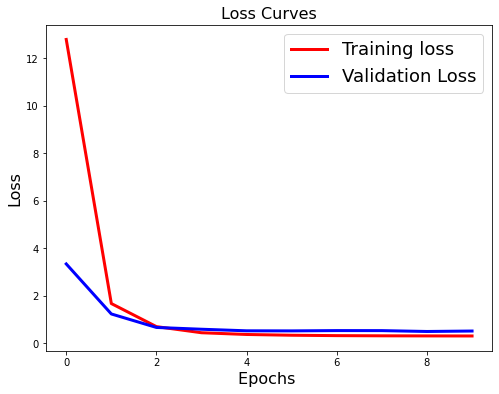

In [ ]:
# 손실값 그래프 그리기
loss_graph(history1)

In [ ]:
# 테스트 데이터로 모델 평가하기위한 함수
def evaluate_model(model):
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("모델 에러율 : %.2f%%" % (100-scores[1]*100))

In [ ]:
evaluate_model(model1)

모델 에러율 : 14.36%


## 4. 데이터 전처리한 모델 만들기
### 4-1. 데이터 전처리
#### * 정규화(normalization)

픽셀 값을 255로 나누어 0~1사이의 값을 가지도록 변환하는 것처럼 데이터를 특정 범위로 변환하는 처리를 정규화(normalization)라고 한다. 딥러닝에서는 데이터의 전처리가 매우 중요한데, 실제 현업에서는 데이터 전체의 분포를 고려해 전처리하는 경우가 많다. 대표적으로 데이터 전체 평균이 0, 표준편차가 1이 되도록 정규화하는 표준화(standardization)가 있다.



In [ ]:
# 픽셀값 0 ~ 255 를 0 ~ 1 사이의 값으로 정규화
X_train = X_train / 255
X_test = X_test / 255


### 4-2. 모델 구성

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# 모델 구성
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 4-3. 모델 학습 모니터링

In [ ]:
# 모델 학습
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 1s - loss: 0.5203 - accuracy: 0.8187 - val_loss: 0.4802 - val_accuracy: 0.8252
Epoch 2/10
300/300 - 1s - loss: 0.3737 - accuracy: 0.8670 - val_loss: 0.3895 - val_accuracy: 0.8590
Epoch 3/10
300/300 - 1s - loss: 0.3316 - accuracy: 0.8803 - val_loss: 0.3536 - val_accuracy: 0.8743
Epoch 4/10
300/300 - 1s - loss: 0.3071 - accuracy: 0.8884 - val_loss: 0.3577 - val_accuracy: 0.8731
Epoch 5/10
300/300 - 1s - loss: 0.2883 - accuracy: 0.8944 - val_loss: 0.3399 - val_accuracy: 0.8784
Epoch 6/10
300/300 - 1s - loss: 0.2720 - accuracy: 0.9004 - val_loss: 0.3332 - val_accuracy: 0.8802
Epoch 7/10
300/300 - 1s - loss: 0.2597 - accuracy: 0.9044 - val_loss: 0.3503 - val_accuracy: 0.8740
Epoch 8/10
300/300 - 1s - loss: 0.2472 - accuracy: 0.9095 - val_loss: 0.3433 - val_accuracy: 0.8749
Epoch 9/10
300/300 - 1s - loss: 0.2352 - accuracy: 0.9123 - val_loss: 0.3274 - val_accuracy: 0.8816
Epoch 10/10
300/300 - 1s - loss: 0.2280 - accuracy: 0.9148 - val_loss: 0.3179 - val_accuracy: 0.8863

### 4-4. 모델v1 예측 및 평가

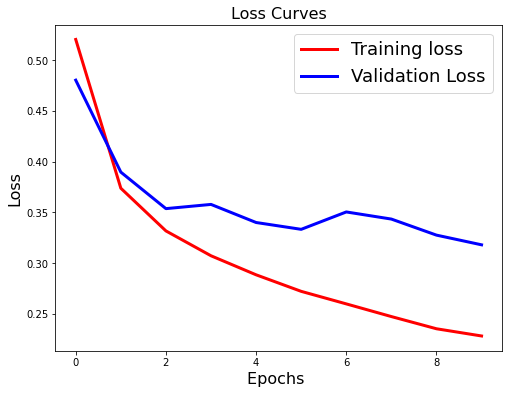

In [ ]:
# 손실값 그래프 그리기
loss_graph(history2)

In [ ]:
# 테스트 데이터로 모델 평가
evaluate_model(model2)

모델 에러율 : 11.37%


## 5. 이미지 처리에 좋은 성능을 보이는 신경망(CNN, 합성곱 신경망)

<img src="https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png" width="700px">

CNN은 심층 신경망에 합성곱 층(convolution layer)와 풀링 층(pooling layer)이라는 고유의 구조를 더한 인공 신경망이다. 기존의 이미지를 처리하는 인공신경망은 이미지 데이터를 단순히 숫자의 모음으로 인식하여 1차원의 숫자 배열 형태로 주욱 펼쳐 연산하였다. 반면 CNN에는 이미지 데이터를 주입할 때, 이미지가 갖추고 있는 3차원 데이터 구조를 파괴하지 않고 마치 퍼즐들의 모음인 것처럼 전달하여 이미지의 특성을 잘 추출할 수 있도록 돕는다.

CNN은 합성곱 연산과 풀링 연산을 반복하며 이미지의 특성을 추출해 나간다. 크기가 큰 이미지 데이터를 신경망의 층을 통과하게 하여 데이터의 크기는 줄이고 이미지의 중요한 특성은 뽑아내는 것이 목적이다. 충분히 합성곱 연산을 수행하여 이미지의 특성 맵을 추출한 후, 데이터의 차원을 펼쳐 완전연결망에 주입하여 이미지를 분류하는 것이 일반적이다.

<img src="https://i.stack.imgur.com/uEoXw.gif" width="600px">

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# 채널 차원을 추가하여 데이터의 shape 변환 [samples][width][height][channels]
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 5-1. 모델 구성

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

# 모델 구성
model3 = Sequential()
model3.add(Conv2D(32, (5, 5), input_shape=X_train.shape[1:], activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

### 5-2. 모델 학습 모니터링

In [ ]:
# 모델 학습
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 1s - loss: 0.5248 - accuracy: 0.8140 - val_loss: 0.3849 - val_accuracy: 0.8625
Epoch 2/10
300/300 - 1s - loss: 0.3464 - accuracy: 0.8783 - val_loss: 0.3287 - val_accuracy: 0.8854
Epoch 3/10
300/300 - 1s - loss: 0.3071 - accuracy: 0.8912 - val_loss: 0.3108 - val_accuracy: 0.8876
Epoch 4/10
300/300 - 1s - loss: 0.2808 - accuracy: 0.8985 - val_loss: 0.2858 - val_accuracy: 0.8974
Epoch 5/10
300/300 - 1s - loss: 0.2578 - accuracy: 0.9068 - val_loss: 0.2712 - val_accuracy: 0.9009
Epoch 6/10
300/300 - 1s - loss: 0.2403 - accuracy: 0.9128 - val_loss: 0.2665 - val_accuracy: 0.9013
Epoch 7/10
300/300 - 1s - loss: 0.2278 - accuracy: 0.9174 - val_loss: 0.2719 - val_accuracy: 0.8997
Epoch 8/10
300/300 - 1s - loss: 0.2131 - accuracy: 0.9218 - val_loss: 0.2532 - val_accuracy: 0.9104
Epoch 9/10
300/300 - 1s - loss: 0.1992 - accuracy: 0.9278 - val_loss: 0.2545 - val_accuracy: 0.9080
Epoch 10/10
300/300 - 1s - loss: 0.1913 - accuracy: 0.9305 - val_loss: 0.2506 - val_accuracy: 0.9123

### 5-3. 모델v2 예측 및 평가

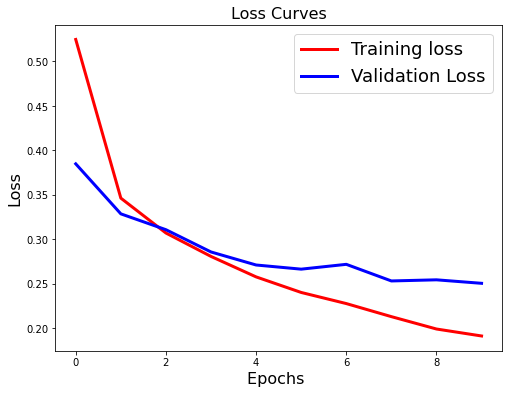

In [ ]:
# 손실값 그래프 그리기
loss_graph(history3)

In [ ]:
# 테스트 데이터로 모델 평가
evaluate_model(model3)

모델 에러율 : 8.77%


### 5-4. 내 손글씨를 테스트 데이터로 사용하기


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving p.png to p.png


In [ ]:
from tensorflow.keras.preprocessing import image

s = image.load_img('t.png', target_size=(28, 28), color_mode="grayscale")

In [ ]:
# samples 변수에 손글씨 파일명 입력하기
samples = ['p.png','t.png']

# 내 손글씨 예측하기
for sample in samples:
  s = image.load_img(sample, target_size=(28, 28), color_mode="grayscale")
  img = image.img_to_array(s).astype('float32')
  print(np.argmax(model3.predict(img.reshape(-1, 28, 28, 1))))

3
0


In [ ]:
https://keras.io/api/datasets/fashion_mnist/
데이터 로드하는 부분 코드를 이렇게 바꾸시면 됩니다
# MNIST 데이터셋 로드
from keras.datasets import fashion_mnist

# X_train: 학습 데이터   y_train: 학습 레이블(정답)
# X_test: 테스트 데이터  y_test: 테스트 레이블(정답)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
